In [1]:
import requests
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from matplotlib import pyplot as pl

In [2]:
from dotenv import load_dotenv
load_dotenv(dotenv_path = '/Users/apple/Documents/GitHub/Zhenwei_Ma/hw08/hw08.env')
private_key = os.getenv('MY_ENV_VAR')

In [3]:
params={'appid':"10b96fb8e4edfdeee830f8798556710f",'q':'Los Angeles'}
r = requests.get('https://api.openweathermap.org/data/2.5/forecast',params=params)
appid="10b96fb8e4edfdeee830f8798556710f"

In [4]:
from cipher_zm2383 import cipher_zm2383

In [5]:
import pandas as pd

def get_wind ( city = 'Los Angeles'):
    """
    The function can help collect 5 day / 3 hour forecast weather data for a specified city.
    
    Parameters
    ----------
    appid: str
        The API key which can be acquired by signing up on the website.
    city: str
        The specific city for which you want to predict weather data.
        
    Returns
    -------
    status: int
        The status codes show the HTTP status, 1XX means Informational, 2XX means Success which is what we want, 3XX means Redirection, 4XX means Client Error, 5XX means Server Error
    df: DataFrame
        The dataframe shows wind data 5 day / 3 hour for a specific city
    
    Examples
    --------
    >>> import API_Client
    >>> a = wea_api_key
    >>> b = 'Tokyo'
    >>> API_Client(a, b)
    (200,
     speed  deg  gust                 Time
 0    0.36  185  0.64  2021-11-17 15:00:00
 1    1.30  195  0.85  2021-11-17 18:00:00
 2    2.50  230  1.57  2021-11-17 21:00:00
 3    3.03  242  2.40  2021-11-18 00:00:00
 4    1.63  244  1.83  2021-11-18 03:00:00
 5    0.62  223  1.13  2021-11-18 06:00:00
 6    1.65  256  2.21  2021-11-18 09:00:00
 7    0.17  170  0.80  2021-11-18 12:00:00
 8    0.60  233  1.03  2021-11-18 15:00:00
 9    1.59  214  1.05  2021-11-18 18:00:00
 10   2.31  228  1.48  2021-11-18 21:00:00
 11   2.56  241  2.11  2021-11-19 00:00:00
 12   1.19  223  1.61  2021-11-19 03:00:00
 13   0.93  232  1.24  2021-11-19 06:00:00
 14   0.38  241  0.77  2021-11-19 09:00:00
 15   0.52  219  0.81  2021-11-19 12:00:00
 16   0.35  229  0.79  2021-11-19 15:00:00
 17   1.07  179  0.90  2021-11-19 18:00:00
 18   1.65  234  1.05  2021-11-19 21:00:00
 19   2.23  239  1.98  2021-11-20 00:00:00
 20   0.96  229  1.35  2021-11-20 03:00:00
 21   0.65  170  0.95  2021-11-20 06:00:00
 22   0.64  110  0.72  2021-11-20 09:00:00
 23   0.36  109  0.52  2021-11-20 12:00:00
 24   0.17   74  0.40  2021-11-20 15:00:00
 25   1.23  214  0.96  2021-11-20 18:00:00
 26   2.15  223  1.24  2021-11-20 21:00:00
 27   2.34  229  1.28  2021-11-21 00:00:00
 28   1.35  265  2.22  2021-11-21 03:00:00
 29   0.78   11  0.90  2021-11-21 06:00:00
 30   1.07    1  1.33  2021-11-21 09:00:00
 31   2.09   14  2.16  2021-11-21 12:00:00
 32   2.45   19  2.50  2021-11-21 15:00:00
 33   1.17   23  2.10  2021-11-21 18:00:00
 34   0.67  146  1.86  2021-11-21 21:00:00
 35   0.88  298  1.80  2021-11-22 00:00:00
 36   3.01   19  3.43  2021-11-22 03:00:00
 37   2.77   12  3.19  2021-11-22 06:00:00
 38   2.67   18  2.75  2021-11-22 09:00:00
 39   2.54    4  2.74  2021-11-22 12:00:00)

    """
    params = {'appid':'10b96fb8e4edfdeee830f8798556710f', 'q':city}
    r = requests.get('https://api.openweathermap.org/data/2.5/forecast', params = params)
    status = r.status_code
    weather_LA = r.json()
    df = pd.DataFrame()
    s = 0
    for s in range(len(weather_LA['list'])):
        wind = pd.DataFrame(weather_LA['list'][s]['wind'], index = [s])
        df = pd.concat([df, wind])
        s = s + 1

    df2 = pd.DataFrame()
    t = 0
    for t in range(len(weather_LA['list'])):
        time = pd.Series(weather_LA['list'][t]['dt_txt'], index = [t])
        time = pd.DataFrame(time)
        df2 = pd.concat([df2, time])
        t = t + 1
    df2.columns = ['Time']

    df = pd.concat([df, df2], axis=1)
    
    return status, df

In [6]:
get_wind("Tokyo")


(200,
     speed  deg   gust                 Time
 0    1.78  339   1.79  2021-12-15 00:00:00
 1    1.90  354   1.91  2021-12-15 03:00:00
 2    1.67  359   2.61  2021-12-15 06:00:00
 3    1.33   15   1.60  2021-12-15 09:00:00
 4    1.61   22   2.08  2021-12-15 12:00:00
 5    0.60  293   0.87  2021-12-15 15:00:00
 6    2.52  306   2.83  2021-12-15 18:00:00
 7    1.73  304   1.77  2021-12-15 21:00:00
 8    2.03  351   2.02  2021-12-16 00:00:00
 9    0.81   65   0.70  2021-12-16 03:00:00
 10   0.76  349   0.96  2021-12-16 06:00:00
 11   0.86  211   1.99  2021-12-16 09:00:00
 12   2.06  257   3.77  2021-12-16 12:00:00
 13   2.92  260   5.64  2021-12-16 15:00:00
 14   2.36  288   3.88  2021-12-16 18:00:00
 15   5.86  346   8.20  2021-12-16 21:00:00
 16   2.79  335   4.48  2021-12-17 00:00:00
 17   0.15   34   2.14  2021-12-17 03:00:00
 18   2.72  138   3.19  2021-12-17 06:00:00
 19   2.97  226   6.48  2021-12-17 09:00:00
 20  10.80  316  13.89  2021-12-17 12:00:00
 21   8.65  291  14.61  20

In [7]:

def get_picture( city = 'Los Angeles'):
    """
    The function can help collect 5 day / 3 hour forecast weather data for a specified city.
    
    Parameters
    ----------
    appid: str
        The API key which can be acquired by signing up on the website.
    city: str
        The specific city for which you want to predict weather data.
        
    Returns
    -------
    status: int
        The status codes show the HTTP status, 1XX means Informational, 2XX means Success which is what we want, 3XX means Redirection, 4XX means Client Error, 5XX means Server Error
    df: DataFrame
        The dataframe shows wind data 5 day / 3 hour for a specific city
    
 

    """
    
    params = {'appid':'10b96fb8e4edfdeee830f8798556710f', 'q':city}
    r = requests.get('https://api.openweathermap.org/data/2.5/forecast', params = params)
    status = r.status_code
    weather_LA = r.json()
    df = pd.DataFrame()
    s = 0
    for s in range(len(weather_LA['list'])):
        wind = pd.DataFrame(weather_LA['list'][s]['wind'], index = [s])
        df = pd.concat([df, wind])
        s = s + 1

    df2 = pd.DataFrame()
    t = 0
    for t in range(len(weather_LA['list'])):
        time = pd.Series(weather_LA['list'][t]['dt_txt'], index = [t])
        time = pd.DataFrame(time)
        df2 = pd.concat([df2, time])
        t = t + 1
    df2.columns = ['Time']

    df = pd.concat([df, df2], axis=1)
    sample_df=df[['speed','Time']]

    sample_df.plot.bar()
    pl.title ("Wind-speed")
    pl.xlabel ("Time")
    pl.ylabel ("Speed")
    
    
    return status

200

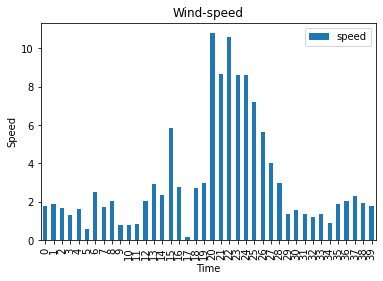

In [9]:
get_picture( 'Tokyo')

In [15]:
def get_temperature( city = 'Los Angeles'):
    """
    The function can help collect 5 day / 3 hour forecast weather data for a specified city.
    
    Parameters
    ----------
    appid: str
        The API key which can be acquired by signing up on the website.
    city: str
        The specific city for which you want to predict weather data.
        
    Returns
    -------
    status: int
        The status codes show the HTTP status, 1XX means Informational, 2XX means Success which is what we want, 3XX means Redirection, 4XX means Client Error, 5XX means Server Error
    df: DataFrame
        The dataframe shows wind data 5 day / 3 hour for a specific city
    
    Examples
    --------
    >>> import API_Client
    >>> a = wea_api_key
    >>> b = 'Tokyo'


    """
    params = {'appid':'10b96fb8e4edfdeee830f8798556710f', 'q': city}
    r = requests.get('https://api.openweathermap.org/data/2.5/forecast', params = params)
    status = r.status_code
    weather_LA = r.json()
    df = pd.DataFrame()
    s = 0
    for s in range(len(weather_LA['list'])):
        main = pd.DataFrame(weather_LA['list'][s]['main'], index = [s])
        df = pd.concat([df, main])
        s = s + 1

    df2 = pd.DataFrame()
    t = 0
    for t in range(len(weather_LA['list'])):
        time = pd.Series(weather_LA['list'][t]['dt_txt'], index = [t])
        time = pd.DataFrame(time)
        df2 = pd.concat([df2, time])
        t = t + 1
    df2.columns = ['Time']

    df = pd.concat([df, df2], axis=1)
    
    return status, df

In [16]:
get_temperature( 'Los Angeles')

(200,
       temp  feels_like  temp_min  temp_max  pressure  sea_level  grnd_level  \
 0   283.51      282.72    283.51    284.04      1011       1011        1000   
 1   283.29      282.19    283.29    283.31      1013       1013        1003   
 2   282.29      280.84    282.29    282.29      1017       1017        1006   
 3   281.80      281.09    281.80    281.80      1019       1019        1009   
 4   281.37      280.07    281.37    281.37      1020       1020        1009   
 5   281.13      280.20    281.13    281.13      1022       1022        1011   
 6   284.07      282.39    284.07    284.07      1023       1023        1013   
 7   285.53      283.79    285.53    285.53      1022       1022        1011   
 8   285.83      284.02    285.83    285.83      1021       1021        1010   
 9   283.90      282.10    283.90    283.90      1023       1023        1012   
 10  283.35      281.57    283.35    283.35      1023       1023        1012   
 11  282.87      282.87    282.87 